# 5. Анализ убытков приложения ProcrastinatePRO+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Наша задача — разобраться в причинах и помочь компании выйти в плюс.


Изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Чтение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
plt.style.use("ggplot")

Импортируем библиотеки. Считаем данные из csv-файлов в датафрейм и сохраним в переменные

                              Структура visits_info_short.csv - хранит лог сервера с информацией о посещениях сайта, :


User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.

In [2]:
visits = pd.read_csv('visits_info_short.csv')   
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


Заменю название колонок

In [3]:
visits = visits.rename(columns={'User Id': 'user_id','Region': 'region', 'Device': 'device', 'Channel':'channel',
                                'Session Start':'session_start', 'Session End':'session_end'})

In [4]:
visits.dtypes

user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object

преобразую дату

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'],format='%Y.%m.%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'],format='%Y.%m.%d %H:%M:%S')

Добавлю колонку с датой

In [6]:
visits['dt'] = visits['session_start'].dt.date
visits['dt'] = pd.to_datetime(visits['dt'],format='%Y.%m.%d')

Проверю на пропуски

In [7]:
visits.isna().mean().sort_values(ascending=False)

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dt               0.0
dtype: float64

Проверю на дубликаты 

In [8]:
visits.duplicated().sum()

0

In [9]:
visits

,user_id,region,device,channel,session_start,session_end,dt
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,2019-05-01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,2019-05-01
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,2019-05-01
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,2019-05-01
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,2019-05-01
...,...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29,2019-10-31
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36,2019-10-31
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31,2019-10-31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55,2019-10-31


In [10]:
visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dt               datetime64[ns]
dtype: object

                              Структура orders_info_short.csv - информация о заказах:


User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

In [11]:
orders = pd.read_csv('orders_info_short.csv')   
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


Переименую колонки 

In [12]:
orders = orders.rename(columns={'User Id': 'user_id','Event Dt': 'event_dt', 'Revenue': 'revenue'})

In [13]:
orders.dtypes

user_id       int64
event_dt     object
revenue     float64
dtype: object

Преобразую дату и выделю ее в отдельный столбец

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'],format='%Y.%m.%d %H:%M:%S')
orders['date'] = orders['event_dt'].dt.date

Определю минимальную и максимальную дату покупок

In [15]:
orders['event_dt'].agg(['min','max'])

min   2019-05-01 00:28:11
max   2019-10-31 23:56:56
Name: event_dt, dtype: datetime64[ns]

Проверю на пропуски

In [16]:
orders.isna().mean().sort_values(ascending=False)

user_id     0.0
event_dt    0.0
revenue     0.0
date        0.0
dtype: float64

Проверю на дубликаты 

In [17]:
orders.duplicated().sum()

0

In [18]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
date                object
dtype: object

In [19]:
orders['date'] = pd.to_datetime(orders['date'],format='%Y.%m.%d')

In [20]:
orders

,user_id,event_dt,revenue,date
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01
2,529610067795,2019-05-01 11:34:04,4.99,2019-05-01
3,319939546352,2019-05-01 15:34:40,4.99,2019-05-01
4,366000285810,2019-05-01 13:59:51,4.99,2019-05-01
...,...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99,2019-10-31
40208,275341387049,2019-10-31 01:17:17,4.99,2019-10-31
40209,374656616484,2019-10-31 06:17:29,4.99,2019-10-31
40210,168548862926,2019-10-31 22:46:19,4.99,2019-10-31


                              Структура costs_info_short.csv - информация о расходах на рекламу:
                              
dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.

In [21]:
costs = pd.read_csv('costs_info_short.csv')   
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Переименую колонки 

In [22]:
costs = costs.rename(columns={'Channel': 'channel'})

Проверю типы данных

In [23]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

Преобразую дату в правильный тип 

In [24]:
costs['dt'] = pd.to_datetime(costs['dt'],format='%Y.%m.%d')

Проверю на пропуски

In [25]:
costs.isna().mean().sort_values(ascending=False)

dt         0.0
channel    0.0
costs      0.0
dtype: float64

Проверю на дубликаты 

In [26]:
costs.duplicated().sum()

0

Проверка данных по доходу и расходам

In [27]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [28]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

# Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [29]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

Функция для расчёта удержания

In [30]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

Функция для расчёта конверсии

In [31]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

LTV

In [32]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [33]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для создания пользовательских профилей

In [34]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [35]:
profiles = get_profiles(visits, orders, costs)

In [36]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [37]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max() 

In [38]:
display('Самая ранняя дата привлечения пользователей {}'.format(min_analysis_date))
display('Самая поздняя дата привлечения пользователей {}'.format(max_analysis_date))

'Самая ранняя дата привлечения пользователей 2019-05-01 00:00:00'

'Самая поздняя дата привлечения пользователей 2019-10-27 00:00:00'

# Исследовательский анализ данных

Региональное распределение пользователей

In [39]:
(profiles.groupby('region')
        .agg({'payer': ['count', 'mean']})   
        .droplevel(0, axis=1)
        .rename(columns={'count': 'total_clients', 'mean': 'payer_share'})
        .reset_index(level=0)
        .sort_values(by='payer_share',ascending = False)
        .reset_index(drop=True)
        .style.format({'payer_share': '{:,.2%}'}))

,region,total_clients,payer_share
0,United States,100002,6.90%
1,Germany,14981,4.11%
2,UK,17575,3.98%
3,France,17450,3.80%


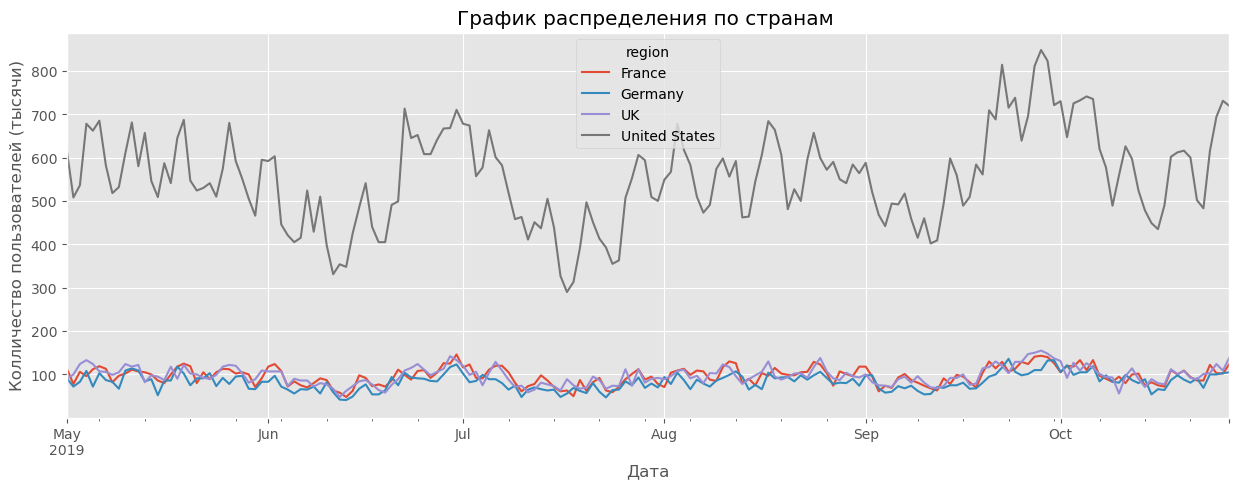

In [40]:
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True).set_title('График распределения по странам ')
plt.xlabel('Дата')
plt.ylabel('Колличество пользователей (тысячи)')
plt.show()

Проверим количество клиентов в разрезе платящих и не платящих пользователей:

In [41]:
region_payer = (profiles
                .pivot_table(index='region', columns='payer', values='user_id', aggfunc='count', margins=True)
                .reset_index()
                .sort_values(by='All', ascending = False)
                .drop(4, axis=0)
                .reset_index(drop=True))

region_payer

payer,region,False,True,All
0,United States,93100,6902,100002
1,UK,16875,700,17575
2,France,16787,663,17450
3,Germany,14365,616,14981


Проанализируем устройства пользователей

In [42]:
(profiles.groupby('device')
        .agg({'payer': ['count', 'mean']})   
        .droplevel(0, axis=1)
        .rename(columns={'count': 'total_clients', 'mean': 'payer_share'})
        .reset_index(level=0)
        .sort_values(by='payer_share',ascending = False)
        .reset_index(drop=True)
        .style.format({'payer_share': '{:,.2%}'}))

,device,total_clients,payer_share
0,Mac,30042,6.36%
1,iPhone,54479,6.21%
2,Android,35032,5.85%
3,PC,30455,5.05%


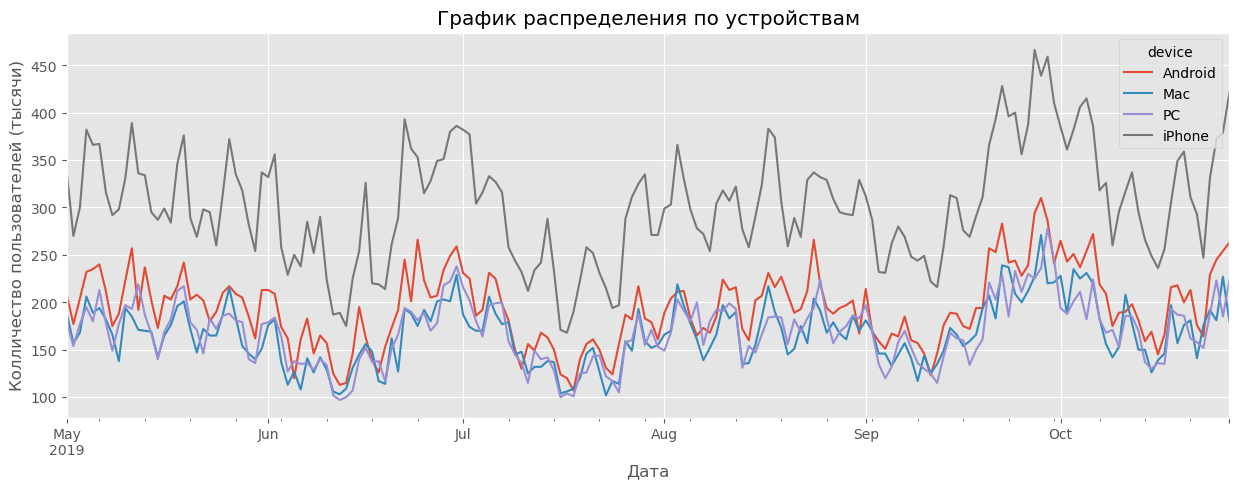

In [43]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='device',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True).set_title('График распределения по устройствам')
plt.xlabel('Дата')
plt.ylabel('Колличество пользователей (тысячи)')
plt.show()

Проверим количество устройств в разрезе платящих и не платящих пользователей:

In [44]:
device_payer = (profiles
                .pivot_table(index='device', columns='payer', values='user_id', aggfunc='count', margins=True)
                .reset_index()
                .sort_values(by='All', ascending = False)
                .drop(4, axis=0)
                .reset_index(drop=True))

device_payer

payer,device,False,True,All
0,iPhone,51097,3382,54479
1,Android,32982,2050,35032
2,PC,28918,1537,30455
3,Mac,28130,1912,30042


Проанализируем каналы привлечения пользователей

In [45]:
(profiles.groupby('channel')
         .agg({'payer': ['count', 'mean']})   
         .droplevel(0, axis=1)
         .rename(columns={'count': 'total_clients', 'mean': 'payer_share'})
         .reset_index(level=0)
         .sort_values(by='payer_share',ascending = False)
         .reset_index(drop=True)
         .style.format({'payer_share': '{:,.2%}'}))

,channel,total_clients,payer_share
0,FaceBoom,29144,12.20%
1,AdNonSense,3880,11.34%
2,lambdaMediaAds,2149,10.47%
3,TipTop,19561,9.60%
4,RocketSuperAds,4448,7.91%
5,WahooNetBanner,8553,5.30%
6,YRabbit,4312,3.83%
7,MediaTornado,4364,3.57%
8,LeapBob,8553,3.06%
9,OppleCreativeMedia,8605,2.71%


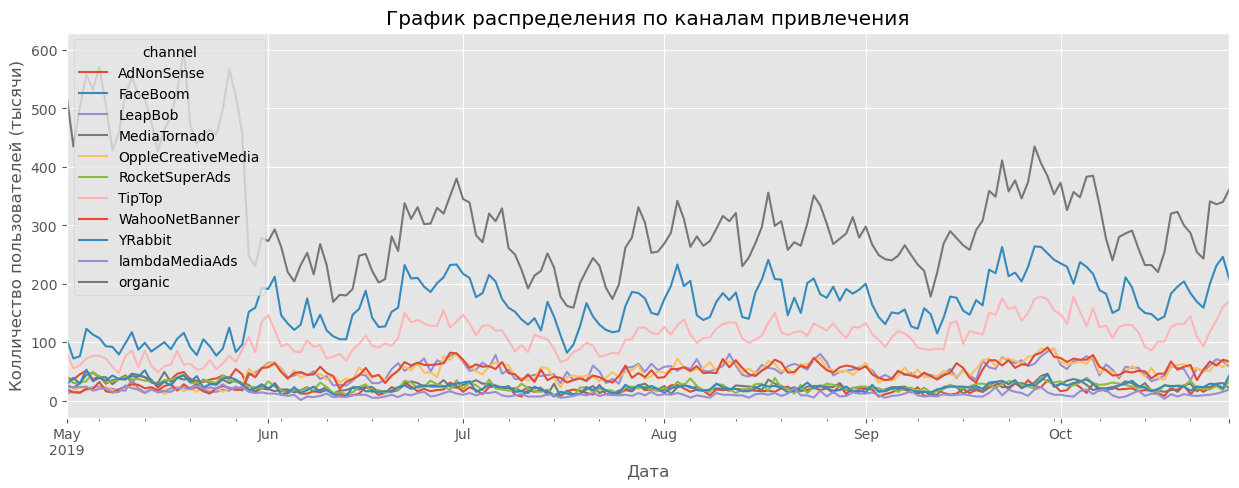

In [46]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True).set_title('График распределения по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Колличество пользователей (тысячи)')
plt.show()

Проверим объем каналов привлечения в разрезе платящих и не платящих пользователей:

In [47]:
channel_payer = (profiles
                .pivot_table(index='channel', columns='payer', values='user_id', aggfunc='count', margins=True)
                .reset_index()
                .sort_values(by='All', ascending = False)
                .drop(11, axis=0)
                .reset_index(drop=True))

display(channel_payer)

payer,channel,False,True,All
0,organic,55279,1160,56439
1,FaceBoom,25587,3557,29144
2,TipTop,17683,1878,19561
3,OppleCreativeMedia,8372,233,8605
4,LeapBob,8291,262,8553
5,WahooNetBanner,8100,453,8553
6,RocketSuperAds,4096,352,4448
7,MediaTornado,4208,156,4364
8,YRabbit,4147,165,4312
9,AdNonSense,3440,440,3880


Определим наибольшую долю платящих пользователей по каждой стране в разрезе каналов:

In [48]:
(profiles.groupby(['region', 'channel'])
         .agg({'payer': 'mean'})
         .reset_index()
         .rename(columns={'payer': 'payer_share'})
         .sort_values(by=['region', 'payer_share'],ascending = False)
         .style.format({'payer_share': '{:,.2%}'}))

,region,channel,payer_share
18,United States,FaceBoom,12.20%
21,United States,TipTop,9.60%
20,United States,RocketSuperAds,7.91%
22,United States,YRabbit,3.83%
19,United States,MediaTornado,3.57%
23,United States,organic,2.08%
12,UK,AdNonSense,11.43%
16,UK,lambdaMediaAds,10.03%
15,UK,WahooNetBanner,5.09%
13,UK,LeapBob,3.38%


Определим наибольшую долю платящих пользователей по каждому каналу в разрезе стран:

In [49]:
(profiles.groupby(['channel', 'region'])
         .agg({'payer': 'mean'})
         .reset_index()
         .rename(columns={'payer': 'payer_share'})
         .sort_values(by=['channel', 'payer_share'],ascending = False)
         .style.format({'payer_share': '{:,.2%}'}))

,channel,region,payer_share
21,organic,Germany,2.31%
23,organic,United States,2.08%
22,organic,UK,2.04%
20,organic,France,1.71%
17,lambdaMediaAds,France,11.05%
18,lambdaMediaAds,Germany,10.32%
19,lambdaMediaAds,UK,10.03%
16,YRabbit,United States,3.83%
14,WahooNetBanner,Germany,5.74%
13,WahooNetBanner,France,5.12%


Посмотрим распределение источников по странам:

In [50]:
(profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count')
         .reset_index()
         .fillna(0))

region,channel,France,Germany,UK,United States
0,AdNonSense,1366.0,1219.0,1295.0,0.0
1,FaceBoom,0.0,0.0,0.0,29144.0
2,LeapBob,2988.0,2519.0,3046.0,0.0
3,MediaTornado,0.0,0.0,0.0,4364.0
4,OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
5,RocketSuperAds,0.0,0.0,0.0,4448.0
6,TipTop,0.0,0.0,0.0,19561.0
7,WahooNetBanner,2971.0,2579.0,3003.0,0.0
8,YRabbit,0.0,0.0,0.0,4312.0
9,lambdaMediaAds,742.0,649.0,758.0,0.0


                                                    Вывод
Приложением пользуются клиенты из 4-х стран и среди них доля платящих пользователей распределена следующим образом:

- США - 6,9% или 6092 человека из 100 тысяч человек,

- Германия - 4,11% или 616 человек из 14981 человека,

- Великобритания - 3,98% или 700 человек из 17575 человек,

- Франция - 3,8% или 663 человека из 17450 человек.


Таким образом, объем фактической клиентской базы (всех текущих пользователей) в США в 5,7 раз больше чем во Франции и Великобритании и в 6,7 раз больше, чем в Германии, при этом доля покупателей среди всех клиентов в США мнее чем в 2 раза превышает этот же показатель в остальных рассматриваемых странах.

Клиенты используют 4 типа устройств: Mac, iPhone, Android и PC, при этом доля платящих пользователей независимо от типа устройства превышает 5%. Тем не менее, покупатели чаще используют Mac (6,36%) и iPhone (6,21% ), а в отношении остальных устройствах доля платящих пользователей составляет менее 6%.

Несмотря на такое процентное соотношение устройств среди покупателей, из общего числа всех клиентов наибольшую популярность имеет iPhone - его используют 54479 человек, что в 1,8 раза превышает количество пользователей Mac и PC (по 30 тысяч человек) и в 1,6 раза превышает количество пользователей Android (35 тысяч человек).

Для привлечения пользователей приложение использует 10 рекламных каналов. Среди них 4 канала привели менее 5% покупателей, а топ-5 наиболее продуктивных площадок с наибольшей долей покупателей составили:

- FaceBoom - 12,2% или 3557 человек из 29144 человек (только США),

- AdNonSense - 11,34% или 440 человек из 3880 человек (только европейский регион),

- lambdaMediaAds - 10,47% или 225 человек из 2149 человек (только европейский регион),

- Tiptop - 9,6% или 1878 человек из 19561 человека (только США),

- RocketSuperAds - 7,91% или 352 человека из 4448 человек (только европейский регион).


С точки зрения общего трафика потенциальных клиентов наиболее успешными площадками являются:

- FaceBoom - 29144 человека,

- Tiptop - 19561 человек,

- OppleCreativeMedia - 8605 человек,

- LeapBob и WahooNetBanner - по 8553 человек


Доля покупателей с канала organic (естественный рост) составила 2,06% с объема трафика в 56439 человек.

# Маркетинг

Так как естесственный прирост клиентов не подразумевает маркетинговых расходов, то для дальнейших расчетов сначала необходимо подготовить датафрейм без данных канала organic:

In [51]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report.sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [52]:
costs['costs'].sum().round()

105497.0

Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 80% всех затрат.

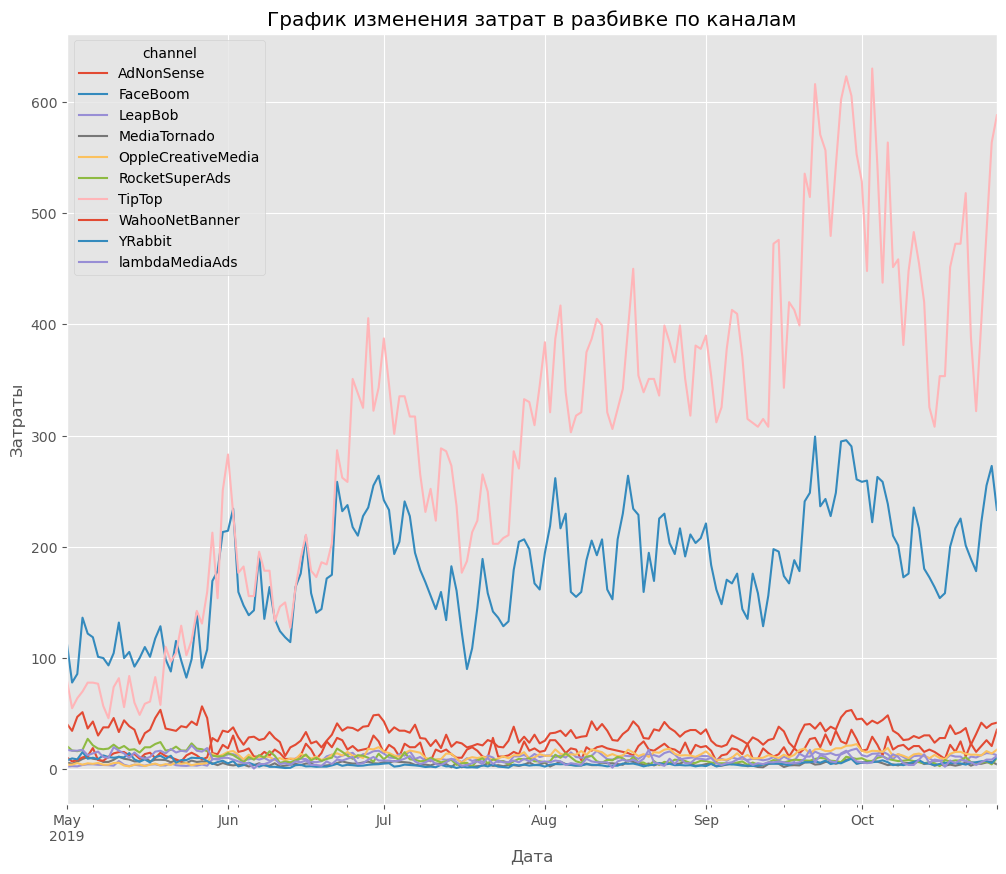

In [53]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

получим порядковый номер недели и месяца из даты 

In [54]:
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles['week'] = profiles['dt'].dt.isocalendar().week
profiles['month'] = profiles['dt'].dt.month 
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40


Text(0, 0.5, 'Затраты')

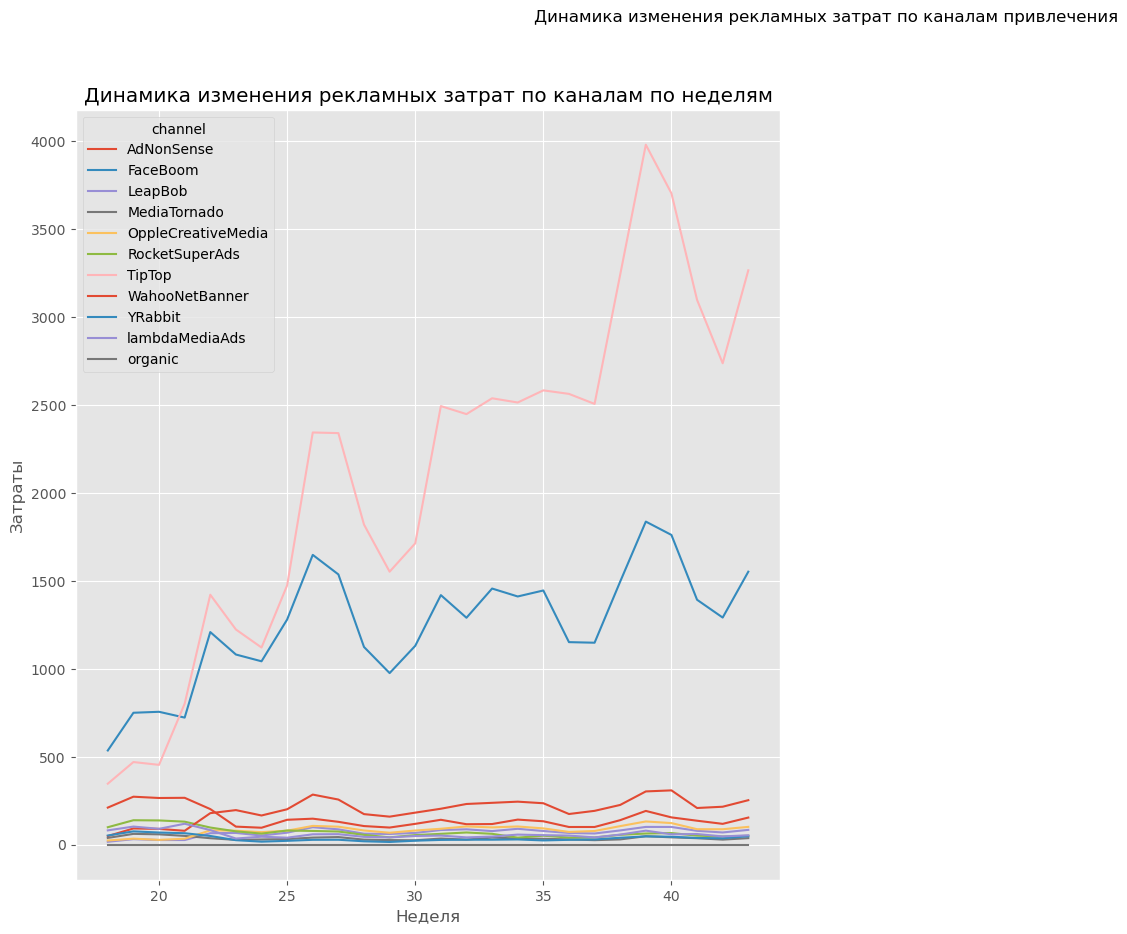

In [55]:
fig, axs = plt.subplots(figsize=(20, 10)) 
fig.suptitle ('Динамика изменения рекламных затрат по каналам привлечения')
profiles.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения рекламных затрат по каналам по неделям')
plt.xlabel('Неделя')
plt.ylabel('Затраты')


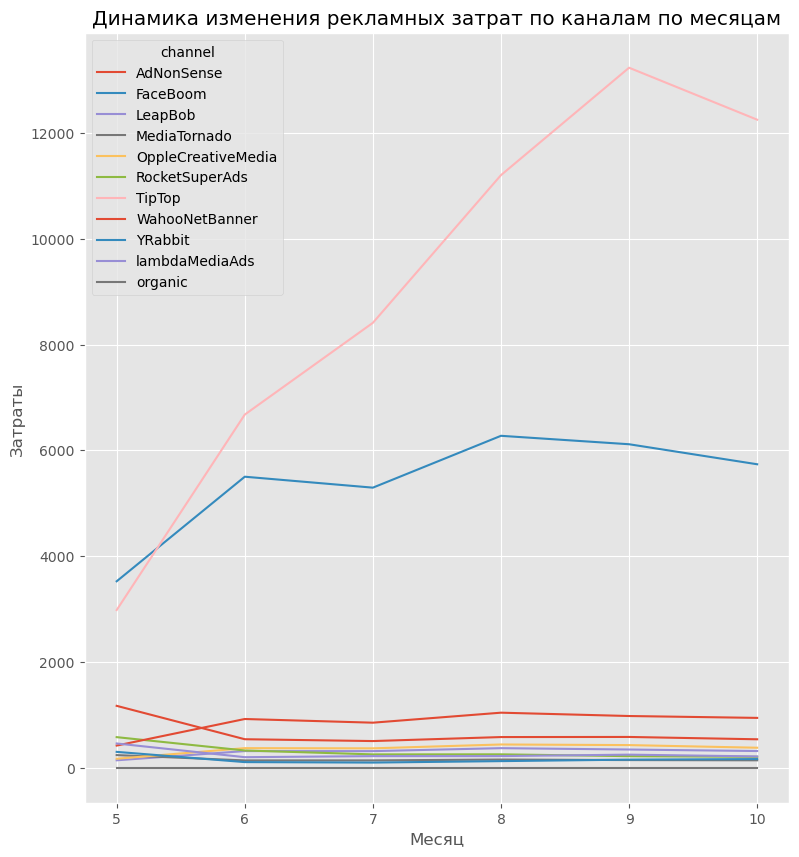

In [56]:
fig, axs = plt.subplots(figsize=(20, 10)) 
profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum') .plot( grid=True,ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения рекламных затрат по каналам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom

Посмотрим на CAC для каждого источника трафика.

In [57]:
cac_by_channel = pd.DataFrame()

уберём органических пользователей

In [58]:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [59]:
profiles['acquisition_cost'].mean()

1.127481323942928

In [60]:
CAC_general = profiles.query('channel != "TipTop"')
CAC_general['acquisition_cost'].mean()

0.6856826289048925

Средний CAC для всего проекта составляет - 1.13.

Но средний CAC без канала TipTop составляет - 0.69

Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01)

Рекомендации для отдела маркетинга:

Сократить расходы на трафик TipTop
Обратить внимание на каналы LeapBob, MediaTornado, YRabbit, OppleCreativeMedia. Привлечение пользователей с этих каналов обходится дешевле всего

# Оценка окупаемости рекламы

функция для сглаживания фрейма

In [61]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

функция для визуализации LTV и ROI

In [62]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

считаем LTV и ROI

In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

строим графики

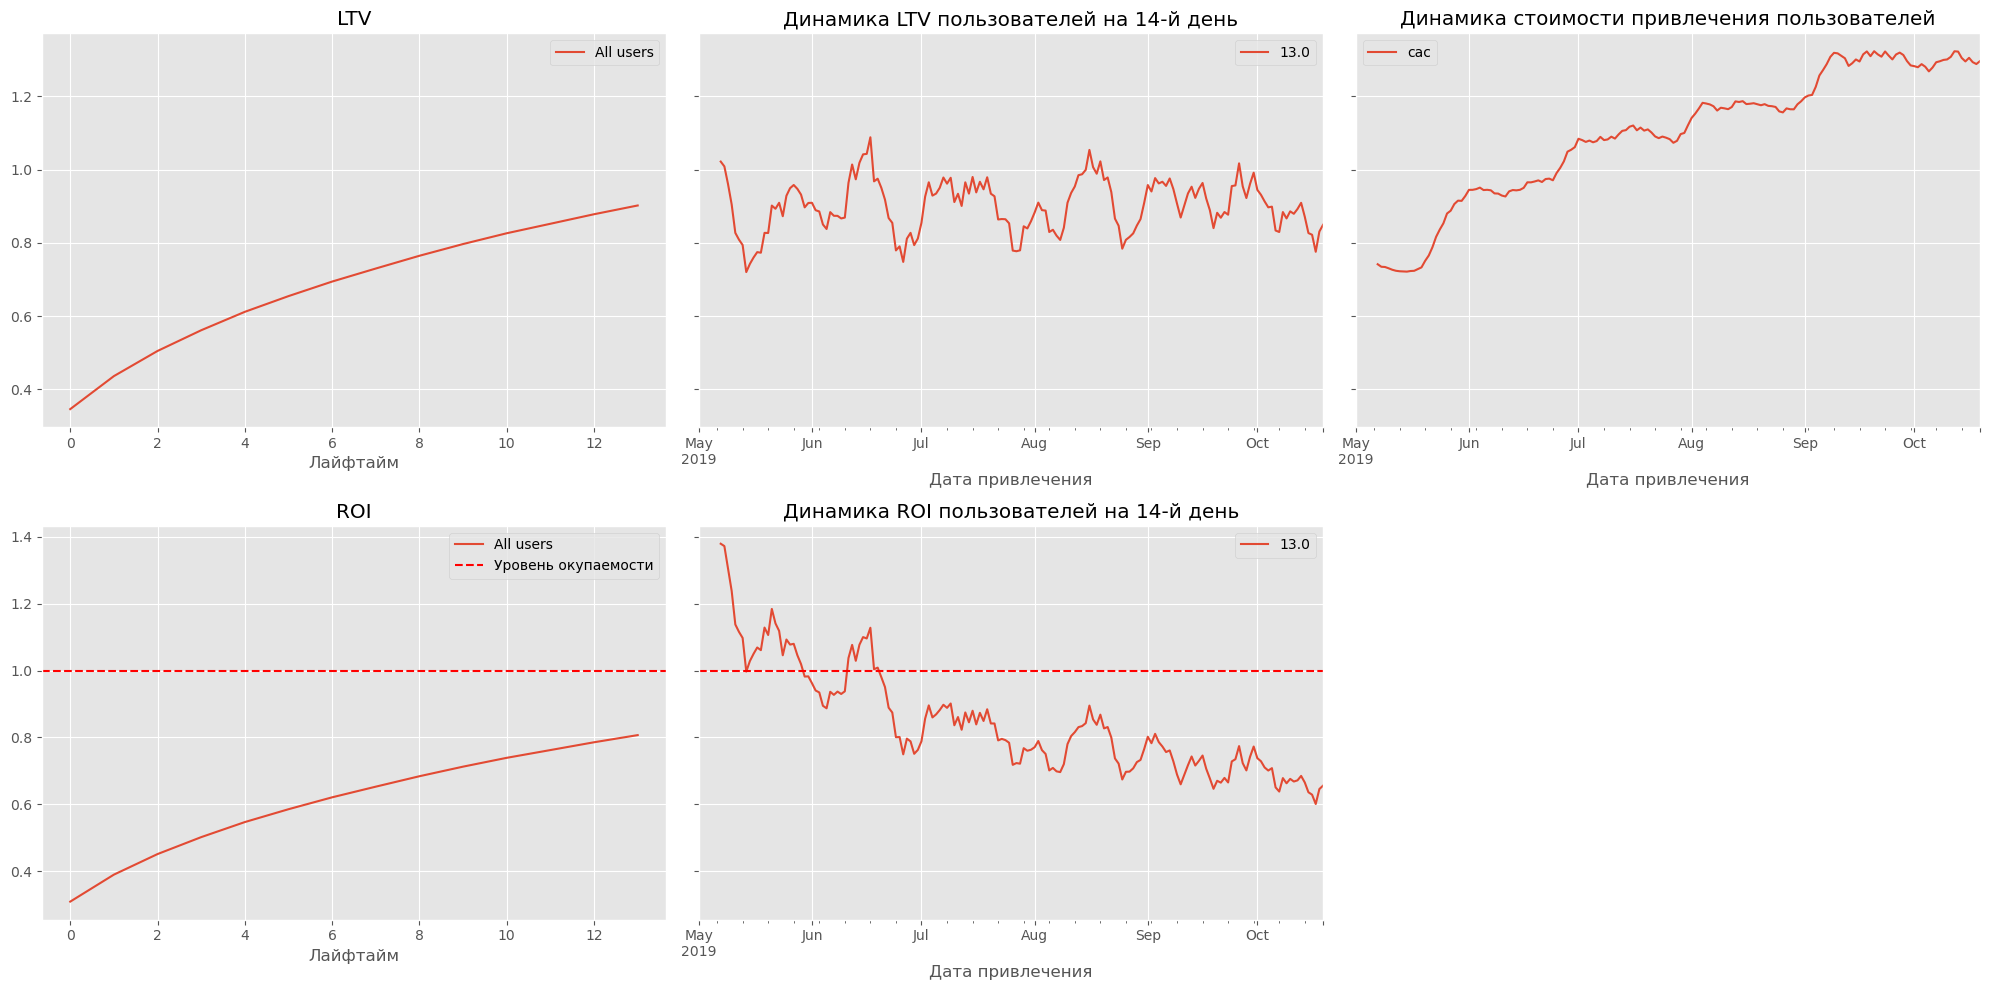

In [64]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

     Вывод по графикам общей окупаемости рекламы:

- ROI не доходит до уровня окупаемости

- CAC на протяжении всего эксперимента растёт

- LTV держится на примерно одном уровне на протяжении всего эксперимента

- Пользователи перестают окупаться уже в июне

смотрим окупаемость с разбивкой по странам

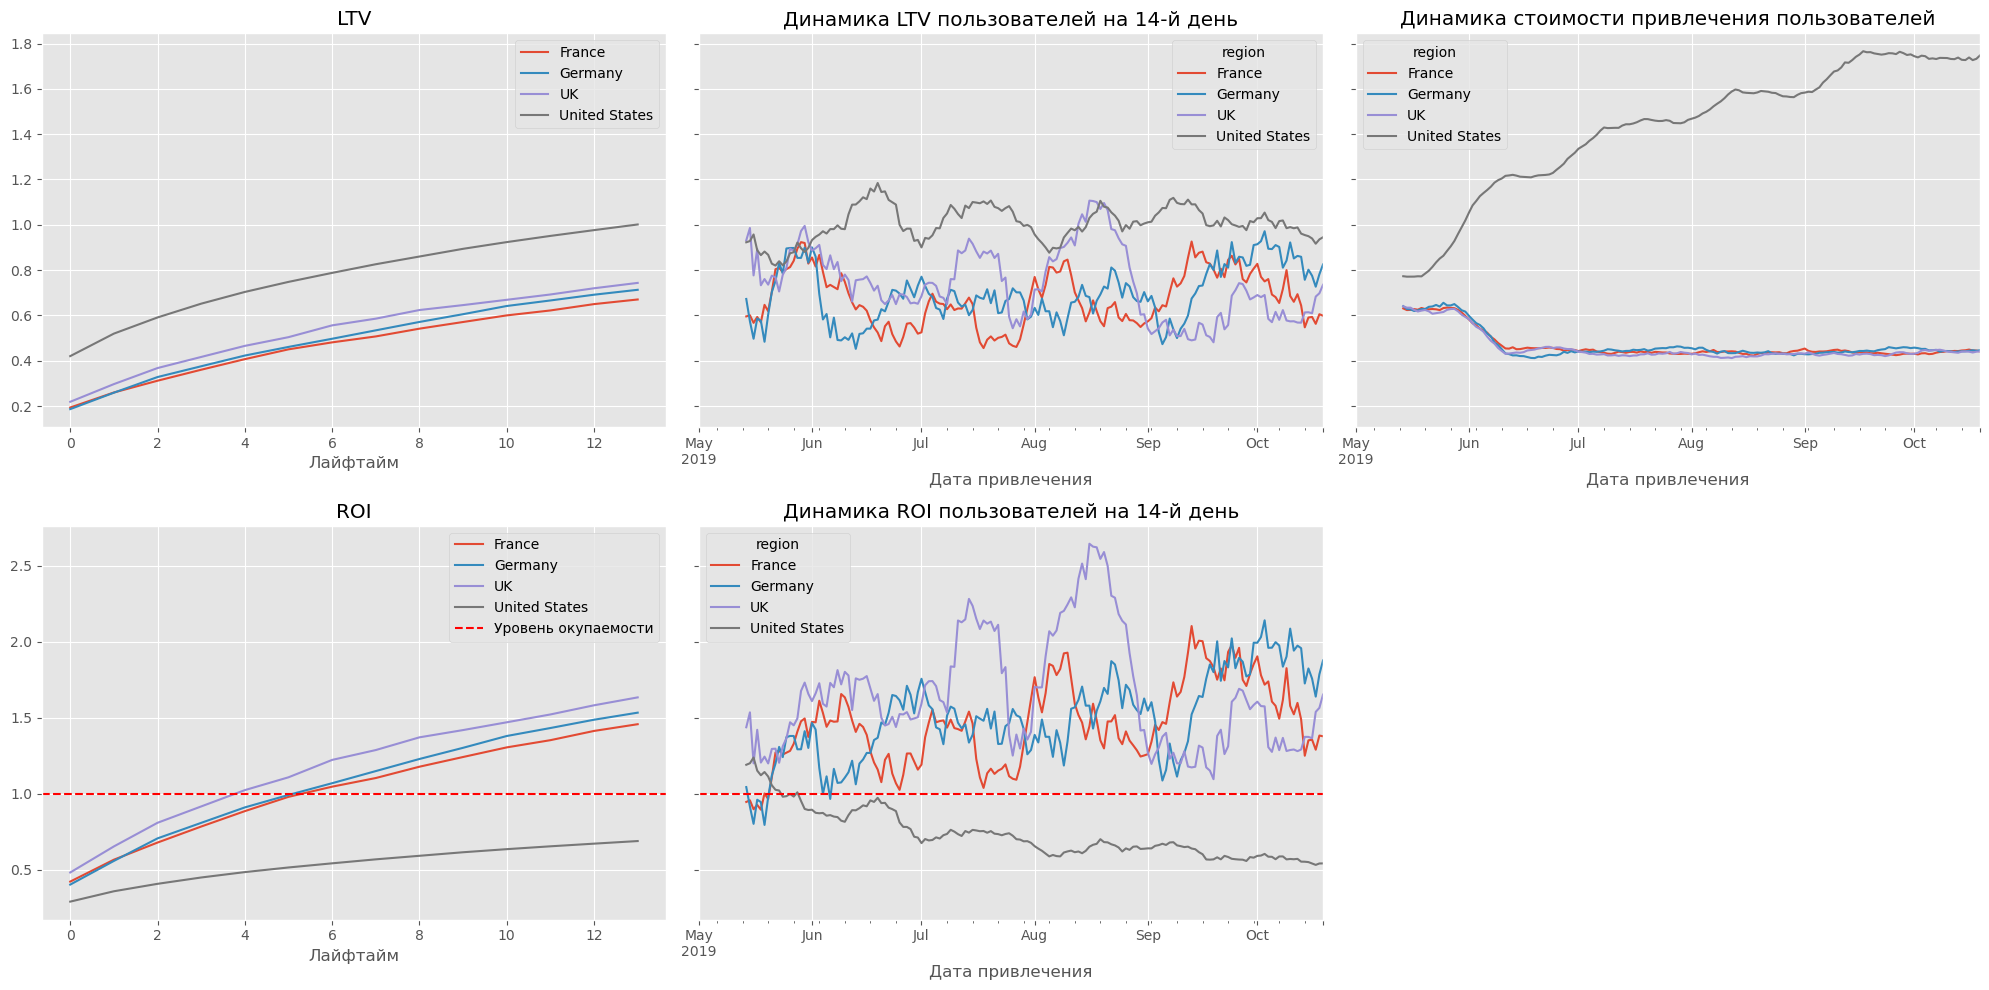

In [65]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

- LTV пользователей из США самый высокий и затраты на рекламу не окупаются (самая высокая стоимость привлечения пользователей) 

- в остальных странах стоимость привлечения пользователей снизилась к июню и далее была стабильной 

- ROI пользователей из Великобритании вышел на показатель в 100% уже на третий день, в остальных странах - на 4 день


смотрим окупаемость с разбивкой по каналам

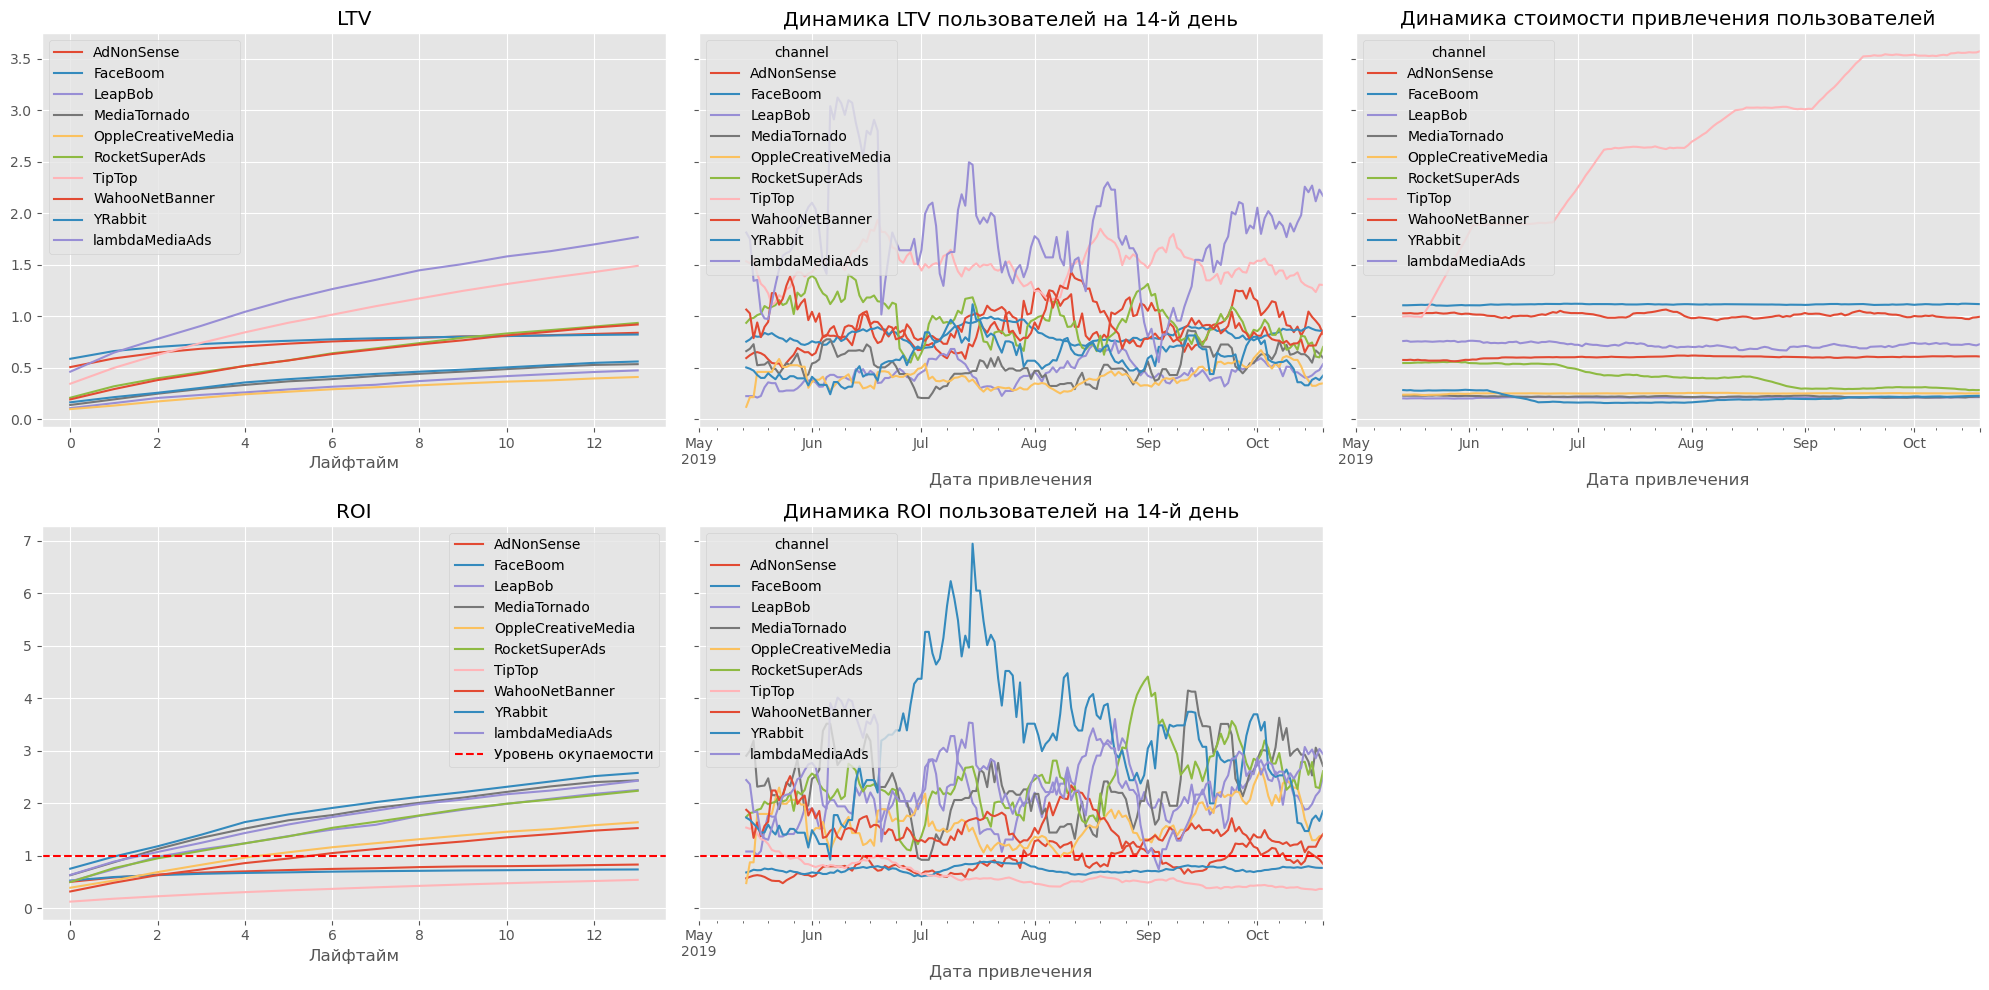

In [66]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

LTV на каналах существенно различается динамика стоимости привлечения пользователей растёт только у TipTop

Не окупаются к концу 2 недели пользователи из каналов:

- TipTop,
- FaceBoom,
- AdNonSense


Самый высокий LTV у канала TipTop и lambdaMediaAds. В динамике у этих каналов также более высокие показатели. Стоимость привлечения пользователей выше всего у канала TipTop.

Затраты на рекламу окупаются быстрее всего у каналов

- YRabbit,
- MediaTornado,
- lambdaMediaAds,
- LeapBob,
- RocketSuperABS Затраты у них окупились в первые три дня


Несмотря на самые высокие затраты на привлечение пользователей , реклама у TipTop не окупилась.

Также не окупилась реклама у каналов FaceBoom и AdNonSense, хотя затраты этих каналов были стабильны выше, чем у других

In [67]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

смотрим конверсию с разбивкой по устройствам

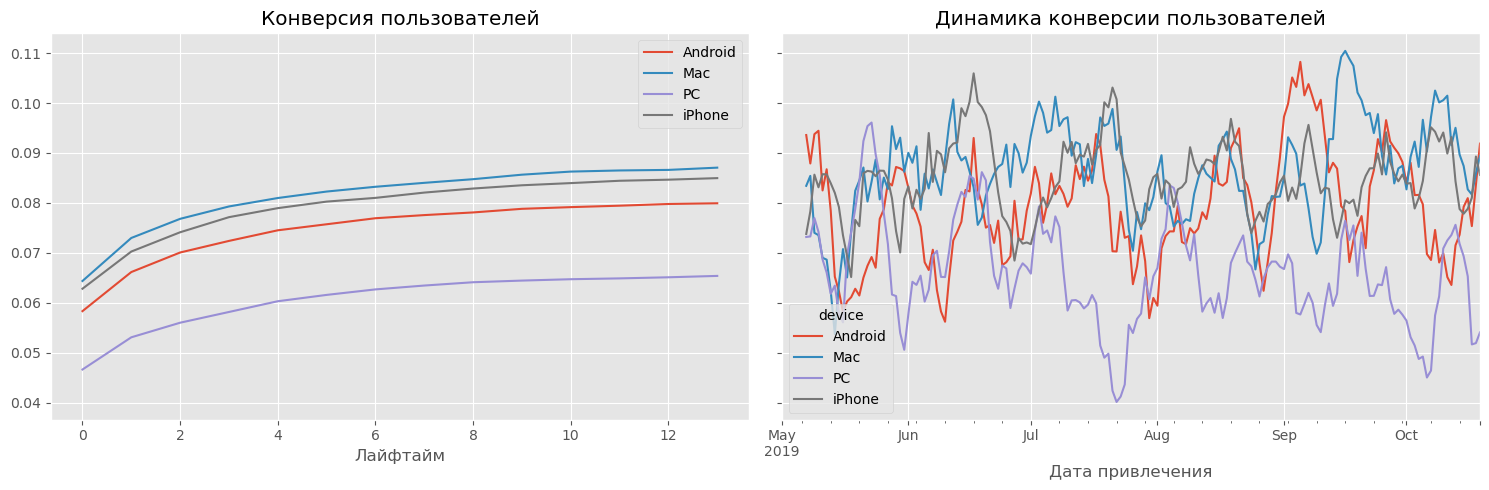

In [68]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Большие просадки по конверсии у пользователей PC и Android

смотрим конверсию с разбивкой по странам

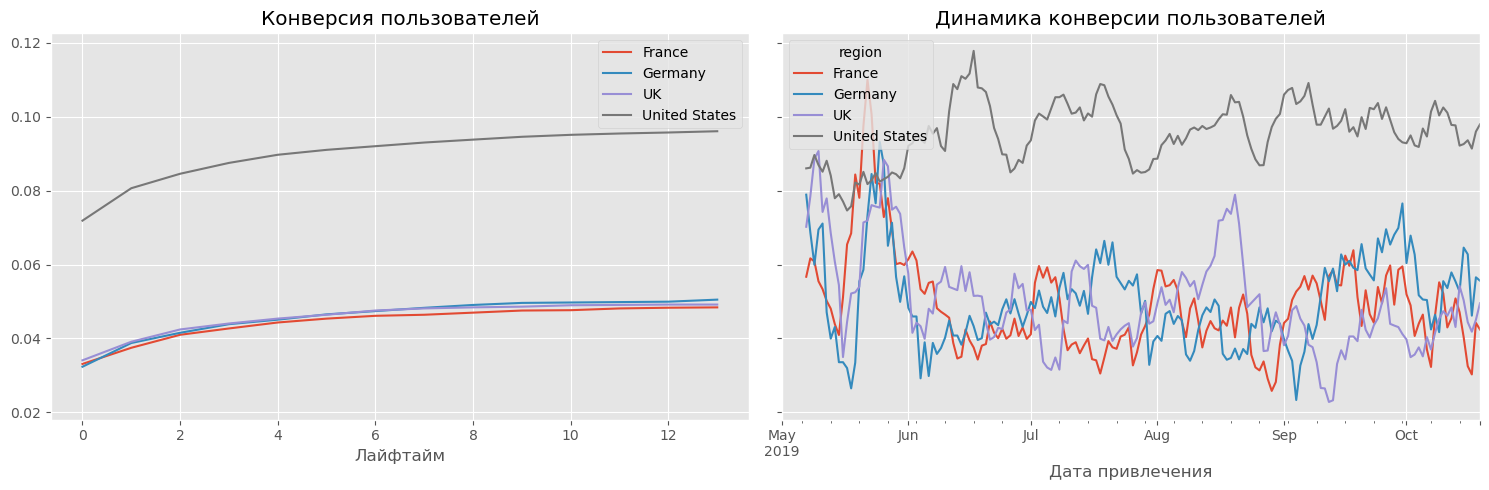

In [69]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из США в 2 раза выше чем у пользователей из других стран

смотрим конверсию с разбивкой по каналам

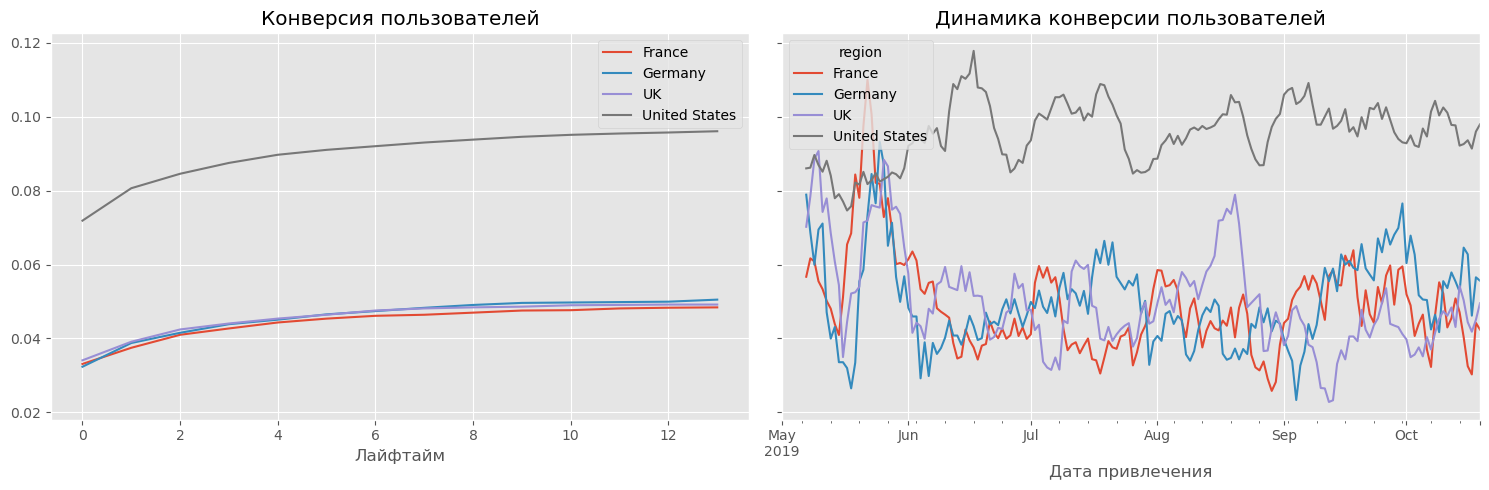

In [70]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

в конверсии пользователей из разных каналов наблюдается сезонность

In [71]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon))
    
    plt.tight_layout()
    plt.show() 

смотрим удержание с разбивкой по устройствам

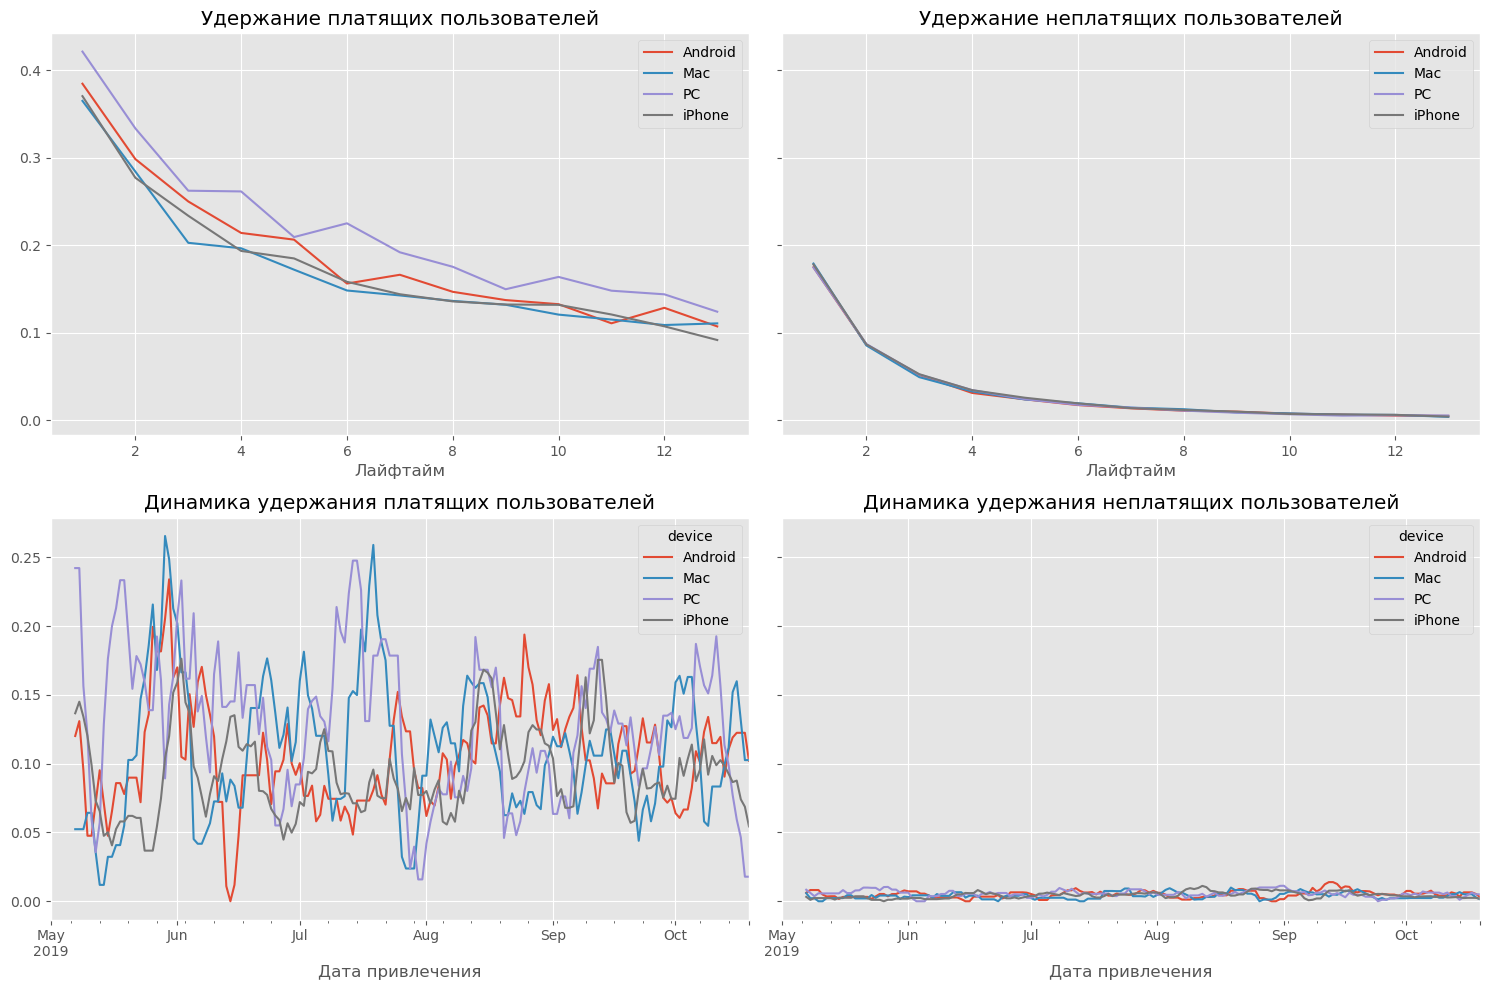

In [72]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

динамика удержания неплатящих пользователей примерно одинаковая

смотрим удержание с разбивкой по странам

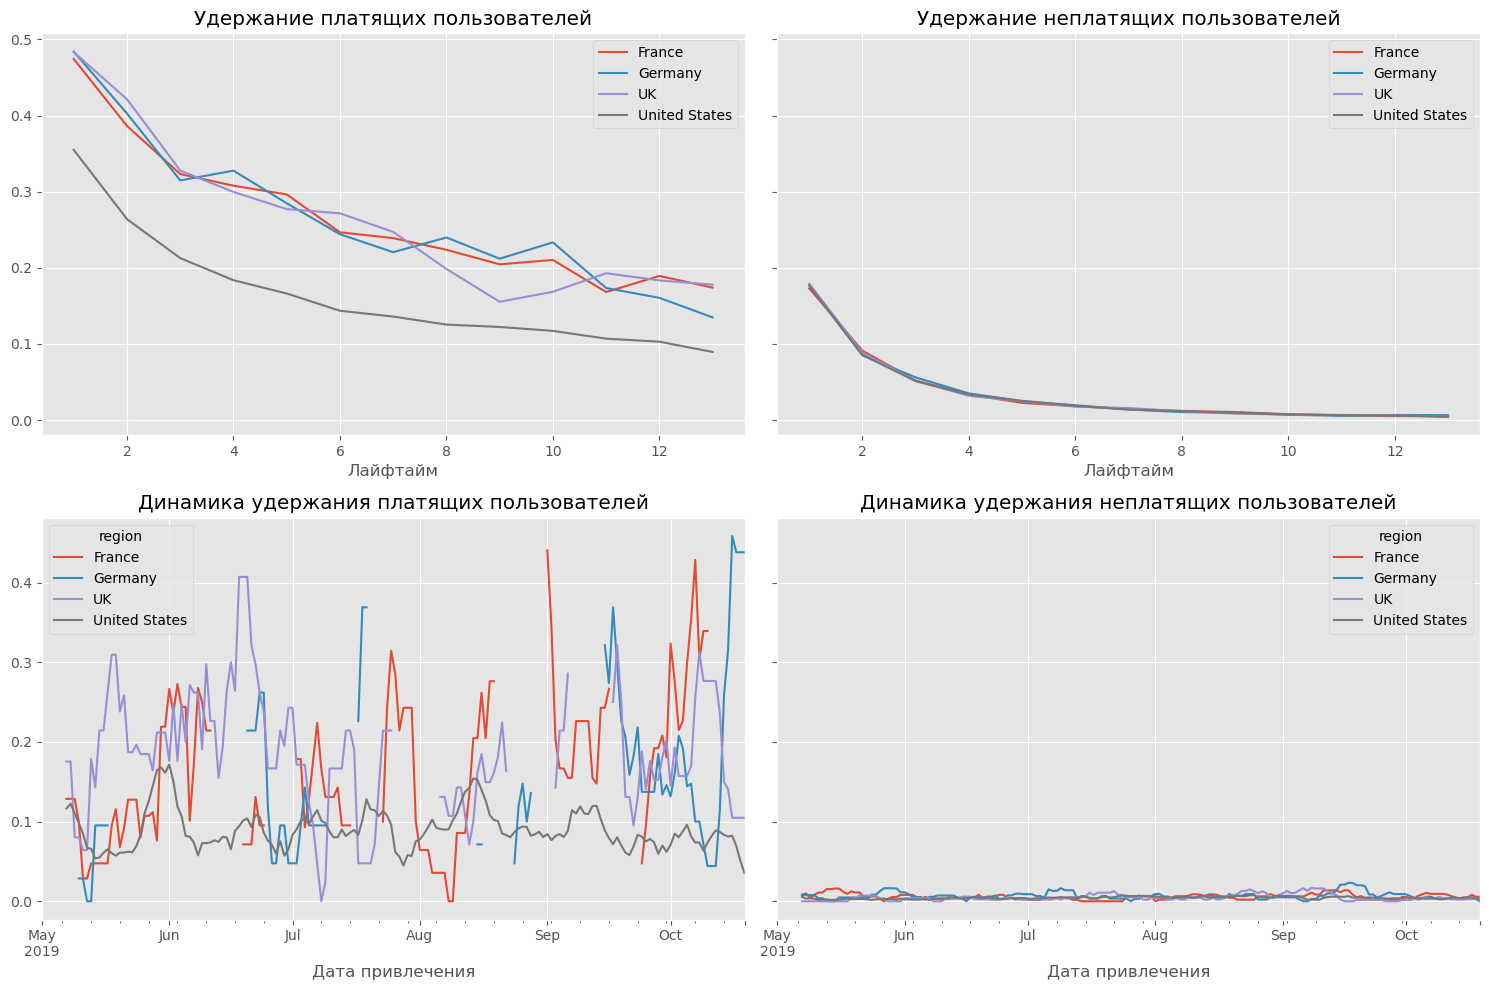

In [73]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей из США самое низкое

смотрим удержание с разбивкой по каналам

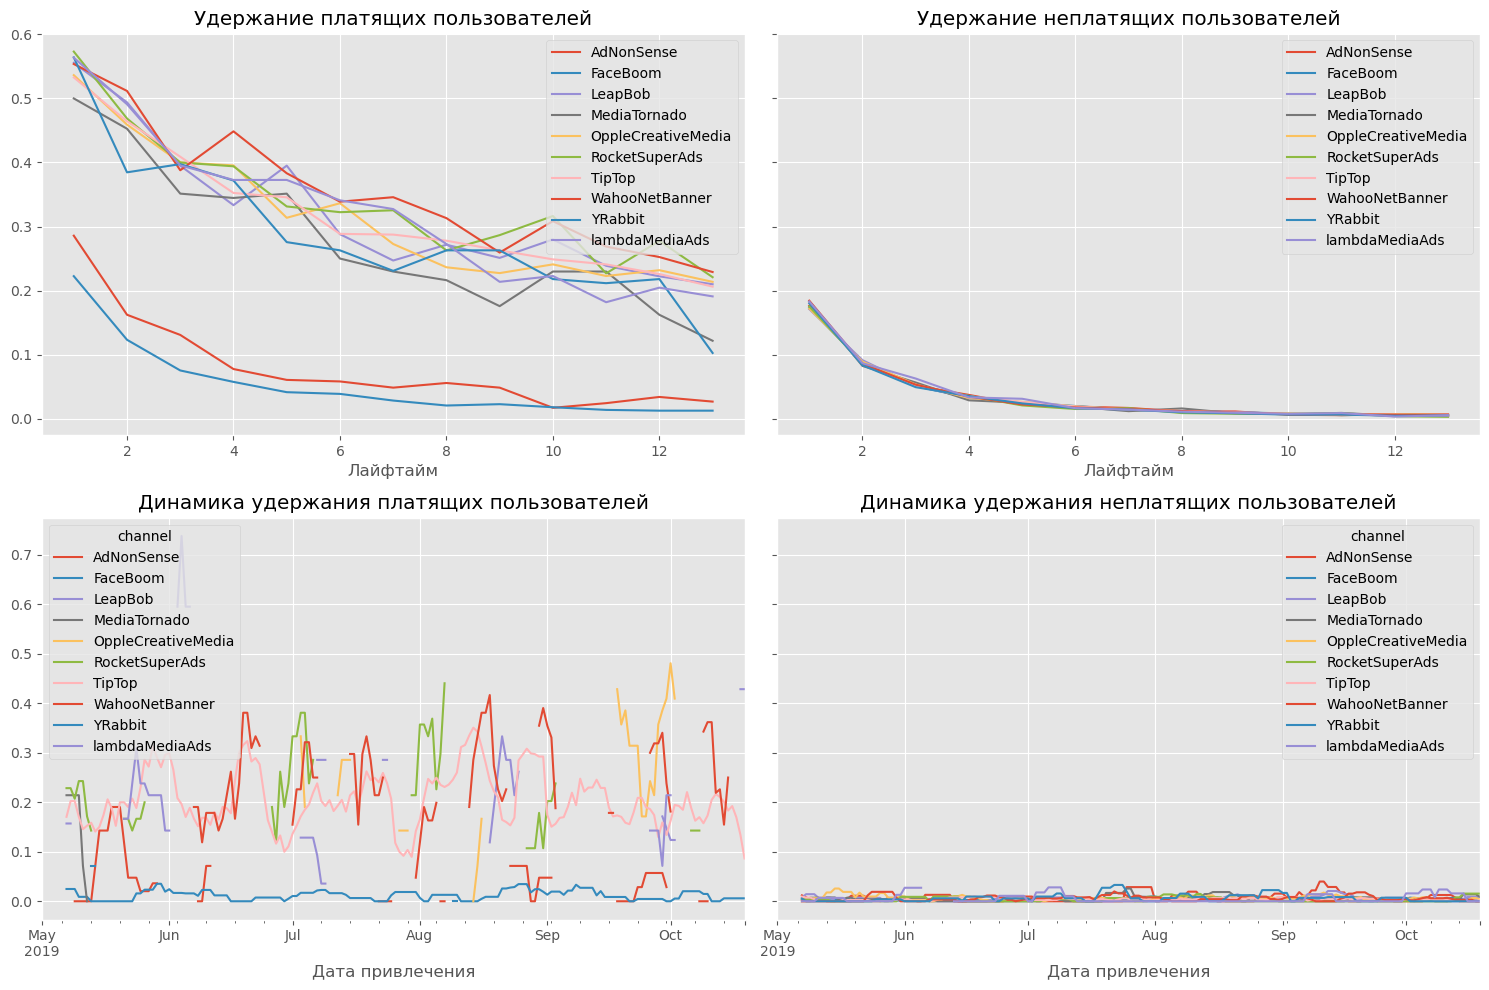

In [74]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей из каналов AdNonSense и FaceBoom самое низкое

Реклама не окупается к концу второй недели.

Из стран USA снижает окупаемость рекламы. Из каналов:

- TipTop,

- FaceBoom,

- AdNonSense.

Хуже всего удерживаются платящие пользователи устройств IPhone и MAC

Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов

TipTop самый невыгодный канал для привлечения, с которого большинство пользователей из страны USA. 
Также стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего

# Выводы

       Причины неэффективности привлечения пользователей.

3 канала инвестиции с которых не окупились:

- AdNonSense,

- FaceBoom,

- TipTop


Основными пользователями с этих каналов являются жители США. Также удержание платящих пользователей из США оказалось хуже всех.

ROI по странам в динамике показал, что с каждым месяцем привлеченные платящие пользователи из США всё хуже окупались, но динамика стоимости привлечения этих пользователей только наращивалась.

Возможные причины, связанные с проблемой рекламы в США:

Летом 2019 произошло какое-то событие в США, которое кардинально повлияло на поведение пользователей пользователи Mac и IPhone оказались самыми неплатящими, возможно есть проблема с оптимизацией приложения Procrastinate Pro+ для ios устройств рекламная система TipTop оказалась неэффективной. Не стоило много вкладывать в этот канал. Можно предположить, что в этой соц сети не сидят жители США, а используют жители других стран, которые подключены к VPN.

Необоснованное увеличение CAC в канале TipTop

Конверсия пользователей FaceBoom была самой высокой, но удержание платящих пользователей было самое низкое. Можно ометить, что этот канал для привлечения работал хорошо, но качество платного контента не устраивало пользователей, поэтому не стоит этот канал списывать со счетов.


                 Рекомендации для отдела маркетинга:

Привлекать больше PC и Android пользователей.

Стоит обратить внимание на 3 недооценённых канала с наивысшим ROI:

Yrabbit,
MediaTornado,
lambdaMediaAds
Платящие PC пользователи удерживаются очень хорошо, но конверсия самая низкая.

Потенциал есть, нужно обратить внимание на саму рекламу

Самый высокий LTV у канала lambdaMediaAds. Платящим пользователям явно нравится продукт, можно попробовать найти подешевле канал привлечения для этих пользователей, чтобы увеличить ROI

